# Sentiment Analysis on IMDB reviews of Barbie

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd 
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing dataset

In [2]:
Barbie_df = pd.read_csv('/kaggle/input/imdb-reviews-on-barbie/barbie_Cleaned.csv')
Barbie_df

,text,rating
0,"Beautiful film, but so preachyLoveofLegacy21 J...",6
1,Clever and fun beginning turns into another le...,6
2,It was depressingcoxaneesa24 July 2023Warning:...,8
3,A Technicolor Dreamheatherhilgers24 July 2023W...,9
4,reasons FOR seeing it and 1 reason AGAINST.im...,7
...,...,...
792,Barbie-not goodthongman22 July 2023The only re...,2
793,Feminism but the rest?iyaseminkose23 July 2023...,5
794,"Great sets, great execution but horrible story...",3
795,Just meh.apriljosey-2903427 July 2023Warning: ...,2


# Shape of Dataset

In [3]:
rows, cols = Barbie_df.shape
print(f"There are {rows} and {cols} columns in dataset")

There are 797 and 2 columns in dataset


# Cleaning the Text

In [4]:
# Iterate through each row in the 'text' column of Barbie_df
for i in range(len(Barbie_df['text'])):
    # Step 1: Remove mentions (e.g., @username)
    Barbie_df['text'][i] = re.sub(r"(@[A-Za-z0-9]+)", "", Barbie_df['text'][i])

    # Step 2: Remove special characters (excluding alphanumeric and spaces)
    Barbie_df['text'][i] = re.sub(r"[^0-9A-Za-z \t]", "", Barbie_df['text'][i])

    # Step 3: Remove URLs
    Barbie_df['text'][i] = re.sub(r"\w+:\/\/\S+", "", Barbie_df['text'][i])

    # Step 4: Remove 'rt' at the beginning of the text
    Barbie_df['text'][i] = re.sub(r"^rt", "", Barbie_df['text'][i], flags=re.IGNORECASE)

    # Step 5: Remove any remaining 'http...' text
    Barbie_df['text'][i] = re.sub(r"http.+", "", Barbie_df['text'][i], flags=re.IGNORECASE)

# The cleaned 'text' column is now stored back in the Barbie_df DataFrame


In [5]:
Barbie_df['text'][0]

'Beautiful film but so preachyLoveofLegacy21 July 2023Margot does the best with what shes given but this film was very disappointing to me It was marketed as a fun quirky satire with homages to other movies It started that way but ended with overdramatized speeches and an ending that clearly tried to make the audience feel something but left everyone just feeling confused And before you say Im a crotchety old man Im a woman in my 20s so Im pretty sure Im this movies target audience The saddest part is there were parents with their kids in the theater that were victims of the poor marketing because this is not a kids movie Overall the humor was fun on occasion and the film is beautiful to look at but the whole concept falls apart in the second half of the film and becomes a pity party for the strong woman1190 out of 1646 found this helpful Was this review helpful Sign in to votePermalink'

# Removing duplicate values

In [6]:
print(f"There are {Barbie_df.duplicated().sum()} duplicate values")
Barbie_df = Barbie_df.drop_duplicates()

There are 0 duplicate values


In [7]:
print(f"There are {Barbie_df.duplicated().sum()} duplicate values")

There are 0 duplicate values


In [8]:
Barbie_df.describe()

,text,rating
count,797,797
unique,797,16
top,Beautiful film but so preachyLoveofLegacy21 Ju...,1
freq,1,264


In [9]:
Barbie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 796
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    797 non-null    object
 1   rating  797 non-null    object
dtypes: object(2)
memory usage: 18.7+ KB


# Check Null values

In [10]:
Barbie_df.isna().sum()

text      0
rating    0
dtype: int64

# Analyzing the sentiments 

In [11]:
#VADER (Valence Aware Dictionary and sEntiment Reasoner): This is a pre-trained sentiment analysis tool specifically designed for social media text. It's available through the nltk library and is particularly good at understanding sentiment in informal language.
def vader_score(x):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(x)
    return sentiment['compound']

def analyze(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Calculate VADER sentiment scores and analysis labels
Barbie_df['score'] = Barbie_df['text'].apply(vader_score)
Barbie_df['analysis'] = Barbie_df['score'].apply(analyze)

Barbie_df.head()
#here analysis is done for text colume and the data is stored in analysis column

#In this example, we've assumed that a sentiment score greater than or equal to 0.05 is considered positive, a score less than or equal to -0.05 is considered negative, and scores in between are considered neutral. You can adjust these thresholds based on your specific needs.
#Remember to adjust the analyze function according to your specific requirements for labeling sentiment scores. Also, make sure you have the NLTK library installed to use the VADER sentiment analyzer.


,text,rating,score,analysis
0,Beautiful film but so preachyLoveofLegacy21 Ju...,6,0.9874,Positive
1,Clever and fun beginning turns into another le...,6,0.9524,Positive
2,It was depressingcoxaneesa24 July 2023Warning ...,8,0.7579,Positive
3,A Technicolor Dreamheatherhilgers24 July 2023W...,9,0.9733,Positive
4,reasons FOR seeing it and 1 reason AGAINSTims...,7,0.7579,Positive


In [12]:
Barbie_df['analysis'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [13]:
Barbie_df["rating"].value_counts()

1    264
8    119
6     90
7     87
9     81
5     50
3     39
4     37
2     23
H      1
B      1
P      1
M      1
D      1
T      1
A      1
Name: rating, dtype: int64

In [14]:
characters_to_exclude = ['H', 'B', 'P', 'M', 'D', 'T', 'A']
Barbie_df = Barbie_df[~Barbie_df['rating'].isin(characters_to_exclude)]


In [15]:
Barbie_df["rating"].value_counts()

1    264
8    119
6     90
7     87
9     81
5     50
3     39
4     37
2     23
Name: rating, dtype: int64

# Performing EDA

In [16]:
# Display basic information about the dataset
Barbie_df.info()

# Display the first few rows of the dataset
Barbie_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 0 to 796
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      790 non-null    object 
 1   rating    790 non-null    object 
 2   score     790 non-null    float64
 3   analysis  790 non-null    object 
dtypes: float64(1), object(3)
memory usage: 30.9+ KB


,text,rating,score,analysis
0,Beautiful film but so preachyLoveofLegacy21 Ju...,6,0.9874,Positive
1,Clever and fun beginning turns into another le...,6,0.9524,Positive
2,It was depressingcoxaneesa24 July 2023Warning ...,8,0.7579,Positive
3,A Technicolor Dreamheatherhilgers24 July 2023W...,9,0.9733,Positive
4,reasons FOR seeing it and 1 reason AGAINSTims...,7,0.7579,Positive


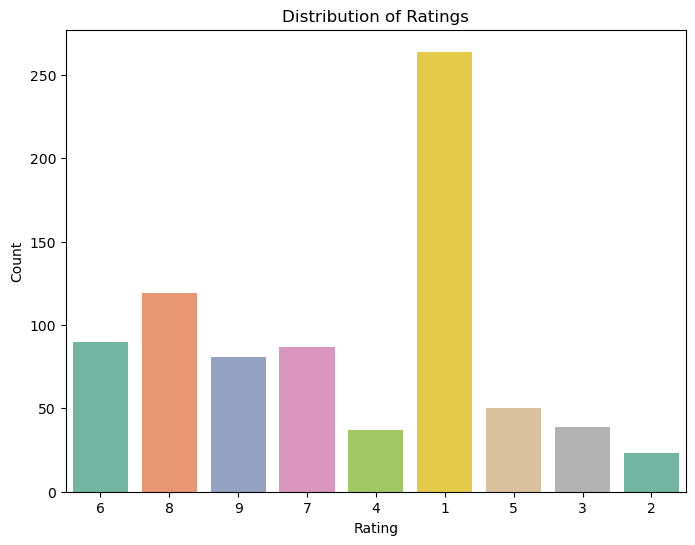

In [17]:
# Check the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=Barbie_df, x='rating', palette='Set2')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

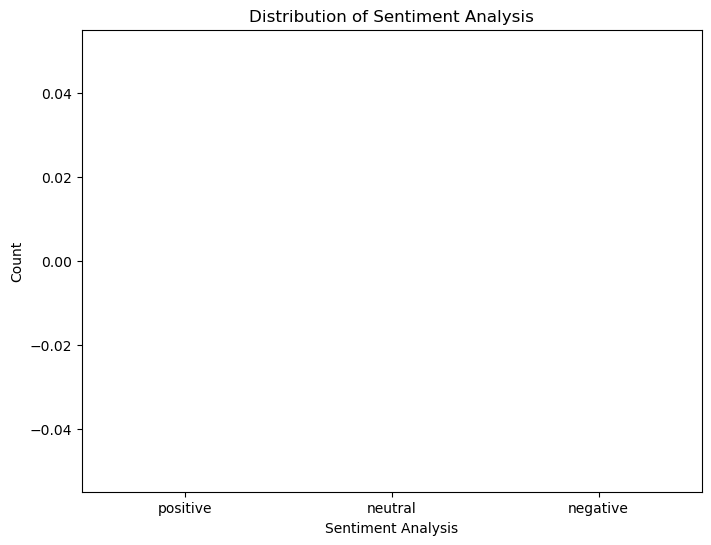

In [18]:
# Check the distribution of sentiment analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=Barbie_df, x='analysis', palette='Set1',
              order=['positive', 'neutral', 'negative'])
plt.title("Distribution of Sentiment Analysis")
plt.xlabel("Sentiment Analysis")
plt.ylabel("Count")
plt.show()

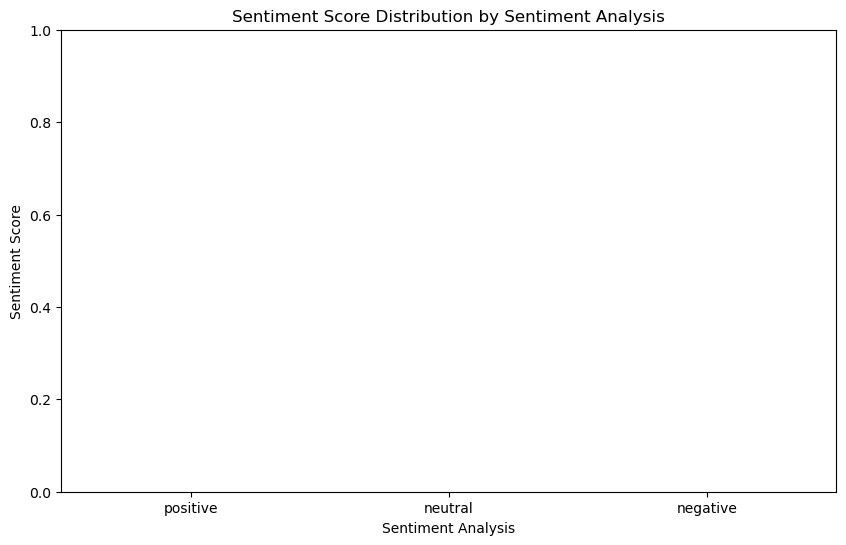

In [19]:
# Box plot of sentiment score by analysis category
plt.figure(figsize=(10, 6))
sns.boxplot(data=Barbie_df, x='analysis', y='score', palette='Set3',
            order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Score Distribution by Sentiment Analysis")
plt.xlabel("Sentiment Analysis")
plt.ylabel("Sentiment Score")
plt.show()

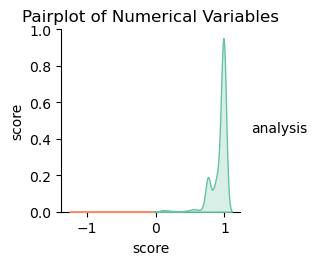

In [20]:
# Pairplot to explore relationships between numerical variables
sns.pairplot(Barbie_df, hue='analysis', diag_kind='kde', palette='Set2')
plt.title("Pairplot of Numerical Variables")
plt.show()


<Figure size 1000x600 with 0 Axes>

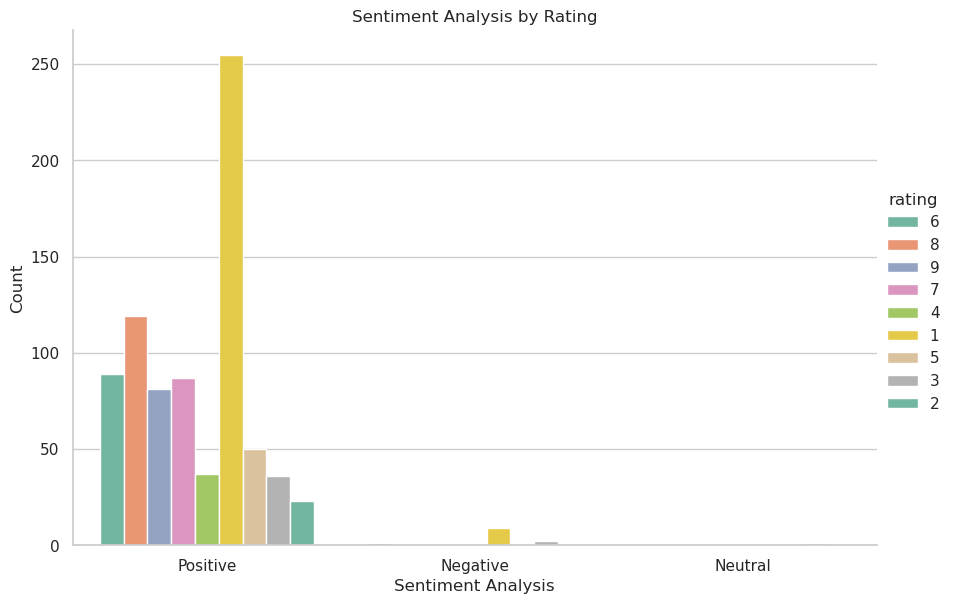

In [21]:

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot using Seaborn's catplot
plt.figure(figsize=(10, 6))
sns.catplot(x='analysis', data=Barbie_df, kind='count', hue='rating', palette='Set2', height=6, aspect=1.5)

# Set plot title and labels
plt.title("Sentiment Analysis by Rating")
plt.xlabel("Sentiment Analysis")
plt.ylabel("Count")

# Show the plot
plt.show()

#In this code, the sns.catplot function is used to create a categorical plot (bar plot) with 'analysis' on the x-axis and different colors for each 'rating'. The palette parameter specifies the color palette to use.
#Remember to replace 'Barbie_df' with the actual name of your DataFrame. This approach provides a more visually appealing and informative bar plot using Seaborn's styling and color palette capabilities.

In [22]:
Barbie_df.describe()

,score
count,790.000000
mean,0.894535
std,0.228164
min,-0.858000
25%,0.880475
50%,0.979250
75%,0.992600
max,0.999900


In [23]:
def rating(x):
    if x>=8 and x<=10:
        return 'Positive'
    elif x>=4 and x<=7:
         return 'Neutral'
    else:
         return 'Negative'

In [24]:
Barbie_df['rating'] = Barbie_df['rating'].astype(int)

In [25]:
Barbie_df['rating_analysis']=Barbie_df['rating'].apply(rating)

In [26]:
Barbie_df['rating'].dtypes

dtype('int64')

In [27]:
Barbie_df.reset_index(inplace = True,drop=True)

In [28]:
Barbie_df['final_analysis'] = 'Postive'

In [29]:
Barbie_df.head(27)

,text,rating,score,analysis,rating_analysis,final_analysis
0,Beautiful film but so preachyLoveofLegacy21 Ju...,6,0.9874,Positive,Neutral,Postive
1,Clever and fun beginning turns into another le...,6,0.9524,Positive,Neutral,Postive
2,It was depressingcoxaneesa24 July 2023Warning ...,8,0.7579,Positive,Positive,Postive
3,A Technicolor Dreamheatherhilgers24 July 2023W...,9,0.9733,Positive,Positive,Postive
4,reasons FOR seeing it and 1 reason AGAINSTims...,7,0.7579,Positive,Neutral,Postive
5,Barbie Is A Weirdly Fun MovieHabibieHakim12319...,8,0.9989,Positive,Positive,Postive
6,Too heavy handedNatcat8722 July 2023Warning Sp...,6,0.7579,Positive,Neutral,Postive
7,Fun and surprisingly touchingjpismyname19 July...,8,0.9978,Positive,Positive,Postive
8,High Highs Low LowsLk199024 July 2023The first...,6,0.9974,Positive,Neutral,Postive
9,Well this really did come as a surpriseSleepin...,8,0.9984,Positive,Positive,Postive


In [30]:
import numpy as np

Barbie_df['final_analysis'] = np.where(
    (Barbie_df['analysis'] == 'Positive') & (Barbie_df['rating_analysis'] == 'Positive'),
    'Positive',
    np.where(
        ((Barbie_df['analysis'] == 'Positive') & (Barbie_df['rating_analysis'] == 'Neutral')) |
        ((Barbie_df['analysis'] == 'Neutral') & (Barbie_df['rating_analysis'] == 'Positive')),
        'Positive',
        np.where(
            ((Barbie_df['analysis'] == 'Negative') & (Barbie_df['rating_analysis'] == 'Neutral')) |
            ((Barbie_df['analysis'] == 'Neutral') & (Barbie_df['rating_analysis'] == 'Negative')),
            'Neutral',
            np.where(
                (Barbie_df['analysis'] == 'Neutral') & (Barbie_df['rating_analysis'] == 'Neutral'),
                'Neutral',
                np.where(
                    (Barbie_df['analysis'] == 'Negative') & (Barbie_df['rating_analysis'] == 'Negative'),
                    'Negative',
                    'Neutral'
                )
            )
        )
    )
)


In [31]:
Barbie_df.head(35)

,text,rating,score,analysis,rating_analysis,final_analysis
0,Beautiful film but so preachyLoveofLegacy21 Ju...,6,0.9874,Positive,Neutral,Positive
1,Clever and fun beginning turns into another le...,6,0.9524,Positive,Neutral,Positive
2,It was depressingcoxaneesa24 July 2023Warning ...,8,0.7579,Positive,Positive,Positive
3,A Technicolor Dreamheatherhilgers24 July 2023W...,9,0.9733,Positive,Positive,Positive
4,reasons FOR seeing it and 1 reason AGAINSTims...,7,0.7579,Positive,Neutral,Positive
5,Barbie Is A Weirdly Fun MovieHabibieHakim12319...,8,0.9989,Positive,Positive,Positive
6,Too heavy handedNatcat8722 July 2023Warning Sp...,6,0.7579,Positive,Neutral,Positive
7,Fun and surprisingly touchingjpismyname19 July...,8,0.9978,Positive,Positive,Positive
8,High Highs Low LowsLk199024 July 2023The first...,6,0.9974,Positive,Neutral,Positive
9,Well this really did come as a surpriseSleepin...,8,0.9984,Positive,Positive,Positive


In [32]:
Barbie_df['final_analysis'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

# Final EDA of the movie Barbie

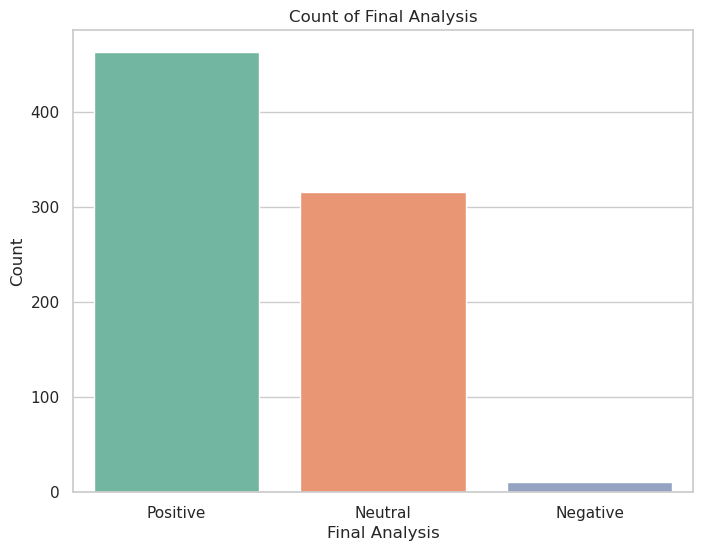

In [33]:
# Set the color palette
color_palette = sns.color_palette("Set2")

# Create a count plot of 'final_analysis'
plt.figure(figsize=(8, 6))
sns.countplot(x='final_analysis', data=Barbie_df, palette=color_palette)
plt.title("Count of Final Analysis")
plt.xlabel("Final Analysis")
plt.ylabel("Count")
plt.show()

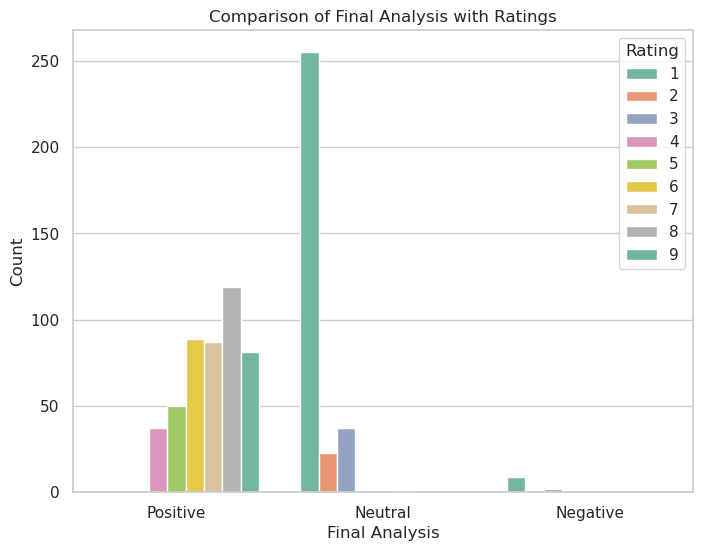

In [34]:
# Compare 'final_analysis' with 'rating'
plt.figure(figsize=(8, 6))
sns.countplot(x='final_analysis', hue='rating', data=Barbie_df, palette=color_palette)
plt.title("Comparison of Final Analysis with Ratings")
plt.xlabel("Final Analysis")
plt.ylabel("Count")
plt.legend(title="Rating")
plt.show()

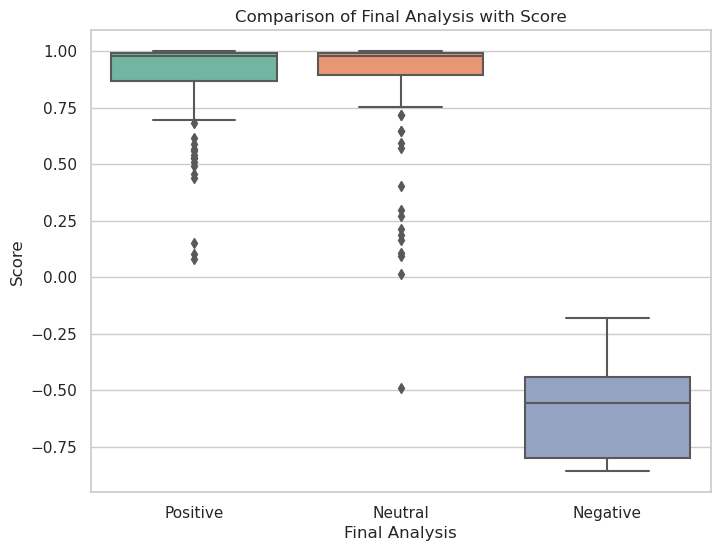

In [35]:
# Compare 'final_analysis' with 'score'
plt.figure(figsize=(8, 6))
sns.boxplot(x='final_analysis', y='score', data=Barbie_df, palette=color_palette)
plt.title("Comparison of Final Analysis with Score")
plt.xlabel("Final Analysis")
plt.ylabel("Score")
plt.show()

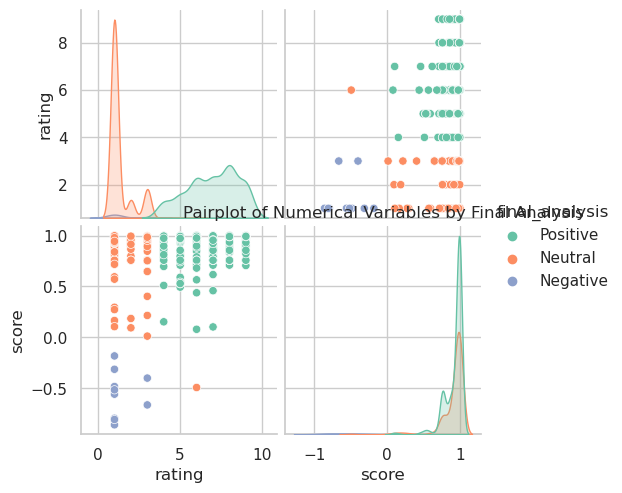

In [36]:
# Compare 'final_analysis' with other numerical variables using pairplot
sns.pairplot(Barbie_df, hue='final_analysis', diag_kind='kde', palette=color_palette)
plt.title("Pairplot of Numerical Variables by Final Analysis")
plt.show()

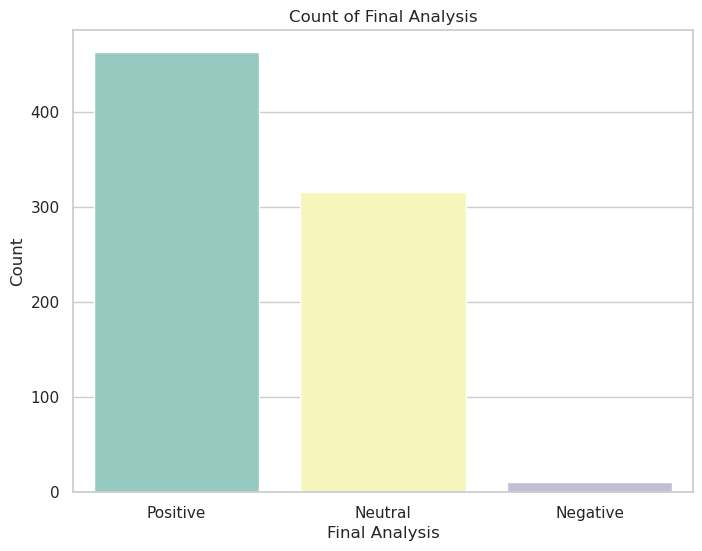

In [37]:
# Set the color palette
color_palette = sns.color_palette("Set3")

# Create a count plot of 'final_analysis'
plt.figure(figsize=(8, 6))
sns.countplot(x='final_analysis', data=Barbie_df, palette=color_palette)
plt.title("Count of Final Analysis")
plt.xlabel("Final Analysis")
plt.ylabel("Count")
plt.show()

> **In conclusion, the count plot above provides an insightful overview of the sentiment analysis results categorized as 'positive', 'neutral', and 'negative'. To gain a deeper understanding, feel free to explore the interactive visualizations presented. They shed light on the relationship between sentiment analysis, ratings, scores, and other features, helping you uncover valuable insights from the dataset.**

# **Have a great day!**